In [8]:
import openpnm as op
import openpnm.topotools as tt
import matplotlib.pyplot as plt
import numpy as np
wrk = op.Workspace()
wrk.settings['loglevel'] = 50

In [9]:
net = op.network.Cubic(shape=[5, 5, 1], spacing=1.0)

In [10]:
Ps = net.Ps
Ts = net.Ts

In [11]:
coords = net['pore.coords']

In [12]:
val = 0.3
signs = [[-1, -1], [-1, 1], [1, 1], [1, -1]]
for xsign, ysign in signs:
    adj = np.zeros_like(coords)
    adj[:, 0] = val*xsign
    adj[:, 1] = val*ysign
    new_coords = coords + adj
    tt.extend(network=net, pore_coords=new_coords)
    new_Ps = net.Ps[-len(Ps):]
    new_conns = np.vstack((Ps, new_Ps)).T
    tt.extend(network=net, throat_conns=new_conns)

In [13]:
net.check_network_health()

{'disconnected_clusters': [], 'isolated_pores': [], 'trim_pores': [], 'duplicate_throats': [], 'bidirectional_throats': [], 'headless_throats': [], 'looped_throats': []}

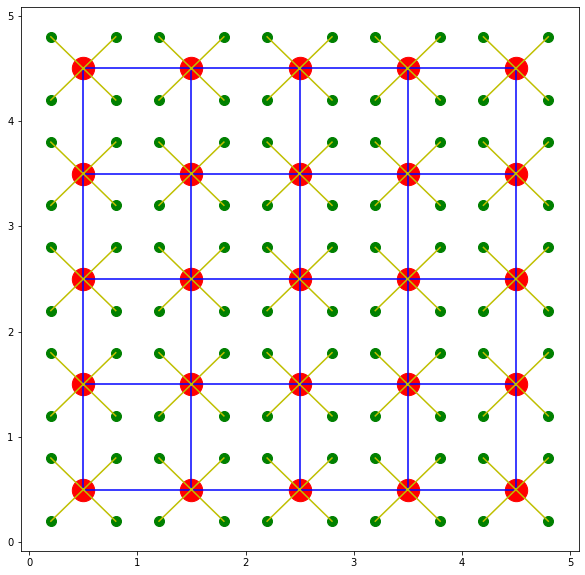

In [14]:
fig, ax = plt.subplots(1, figsize=[10, 10])
fig = tt.plot_connections(network=net, throats=Ts, fig=fig, c='b')
fig = tt.plot_connections(network=net, throats=net.Ts[len(Ts):], fig=fig, c='y')
fig = tt.plot_coordinates(network=net, pores=Ps, c='r', s=500, fig=fig)
fig = tt.plot_coordinates(network=net, pores=net.Ps[len(Ps):], c='g', s=100, fig=fig)
plt.show()